In [1]:
%matplotlib inline
from astropy.table import Table, join
import matplotlib.pyplot as plt
import numpy as np

In [2]:
original = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/NnpzStarSed/develop.fits', hdu=1)

In [3]:
refactor = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/NnpzStarSed/refactor.fits', hdu=1)

In [4]:
[c for c in original.colnames if c not in refactor.colnames]

['FLAGS_1']

In [5]:
joint = join(original, refactor, 'OBJECT_ID')

In [6]:
diff_flags = ~np.equal(joint['FLAGS_1'], joint['FLAGS'])
diff_flags.sum(), len(refactor)

(1404, 5330)

In [7]:
joint[diff_flags]['NEIGHBOR_WEIGHTS_1'][0:5]

5.692939e-39 .. 5.692982e-39
0.08885301 .. 0.08885301
0.18360445 .. 0.18360436
0.01216241 .. 0.012162386
0.0043446324 .. 0.004344618


In [8]:
joint[diff_flags]['NEIGHBOR_WEIGHTS_2'][0:5]

0.5412751 .. 0.07798299
0.46997535 .. 0.43829647
0.7628204 .. 0.80204463
0.24836278 .. 0.2223408
0.2496476 .. 0.28641635


In [9]:
np.finfo(np.float32).tiny

1.1754944e-38

In [10]:
bands = [
    'euclid/VIS_MEAN', 'lsst/u_MEAN',
    'subaru/IB427_MEAN', 'subaru/IB464_MEAN',
    'subaru/IB738_MEAN', 'subaru/IB827_MEAN',
    'euclid/Y_MEAN', 'euclid/H_MEAN'
]

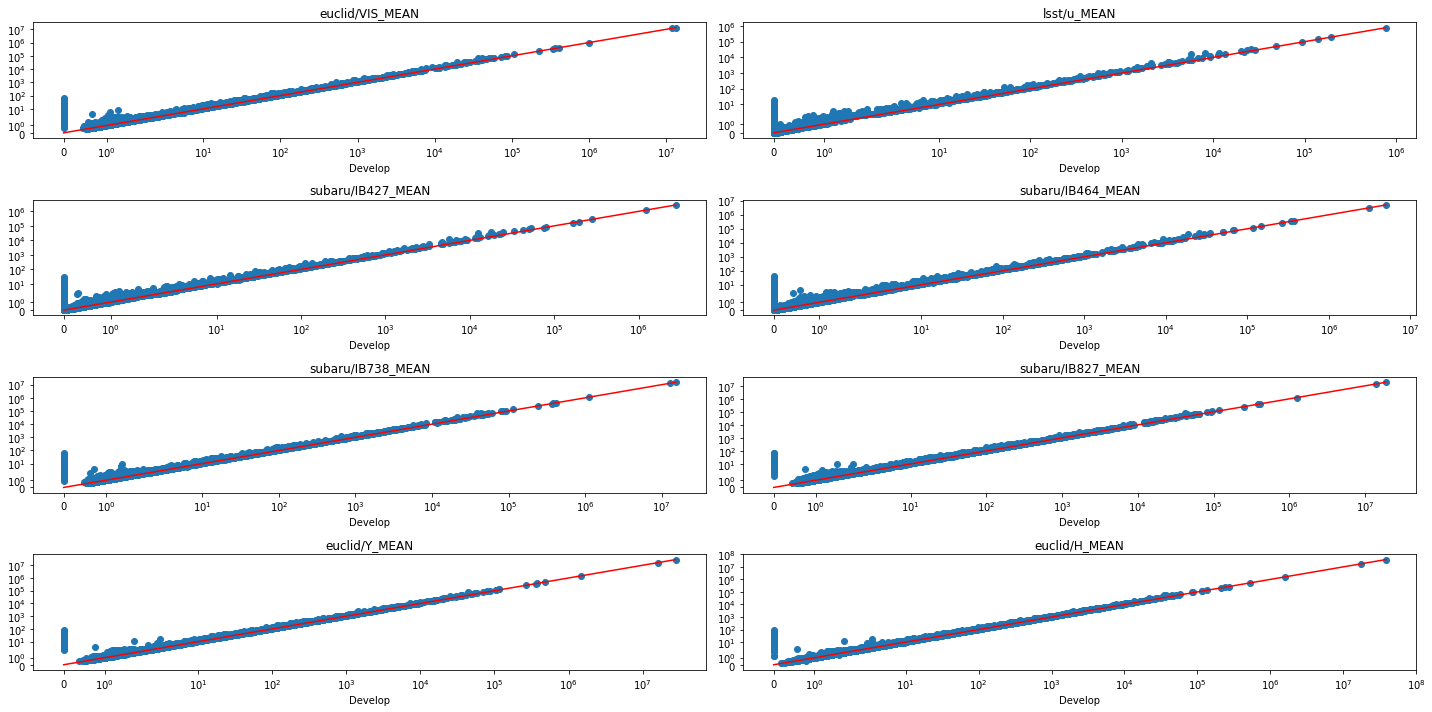

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=len(bands)//2, figsize=(20, 10))
for u, ax in zip(bands, axes.ravel()):
    ax.set_title(u)
    ax.scatter(joint[u+'_1'], joint[u+'_2'])
    corner = [np.min(joint[u+'_1']), np.max(joint[u+'_1'])]
    ax.plot(corner, corner, color='red')
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_xlabel('Develop')
plt.tight_layout()